In [1]:
# import sys
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install statsmodels
# !{sys.executable} -m pip install tabulate
# !{sys.executable} -m pip install httpimport
# !{sys.executable} -m pip install seaborn

import pandas as pd
import statsmodels.api as sm
import numpy as np
from statsmodels.iolib.summary2 import summary_col
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import re
%matplotlib inline

In [4]:
data_panel_diff.columns

Index(['Unnamed: 0', 'city', 'date', 'background', 'law', 'suspects', 'crime',
       'party', 'state', 'plz', 'city_id', 'insgesamt', 'cycle_1', 'cycle_2_x',
       'cycle_3_x', 'crime_count', 'Anzahl Bewerber', 'Prozent Frauen',
       'darunter Frauen', 'year', 'Land', 'city_id_bb', 'cycle_2_y',
       'cycle_3_y', 'crime_count_party_lr', 'crime_count_party',
       'crime_count_lr', 'crime_count_city', 'party_lr', 'Bewerber_city',
       'Frauen_city', 'bewerber_hit_by_lr', 'fem_hit_by_lr',
       'bewerber_party_hit_by_lr', 'fem_party_hit_by_lr', 'p_female',
       'p_female_lr', 'p_female_city', 'p_female_party_lr', 'p_female_diff',
       'p_female_city_diff', 'p_female_lr_diff', 'p_female_party_lr_diff',
       'county', 'pop', 'female', 'share_fem', 'density', 'party_AfD',
       'party_CDU', 'party_DIE LINKE', 'party_FDP', 'party_GRÜNE', 'party_SPD',
       'bl_BB', 'bl_BW', 'bl_HE', 'bl_SN', 'bl_TH'],
      dtype='object')

In [278]:
data_panel_diff = pd.read_csv(r'https://raw.githubusercontent.com/mariusgruenewald/pol_viol/main/data/data_election_crime_merged.csv')
data_panel_diff = pd.concat([data_panel_diff, pd.get_dummies(data_panel_diff['party'], prefix='party')],axis=1)
data_panel_diff = pd.concat([data_panel_diff, pd.get_dummies(data_panel_diff['state'], prefix='bl')],axis=1)
data_panel_diff = pd.concat([data_panel_diff, pd.get_dummies(data_panel_diff['degree_urban'], prefix='du')],axis=1)

data_panel_diff = data_panel_diff[data_panel_diff['cycle_1'] == 2014]
data_panel_diff = data_panel_diff.drop_duplicates(['city', 'party', 'plz', 'state', 'p_female_diff', 'crime_count_party'], ignore_index=True)

# Difference means new - old
data_panel_diff['p_female_diff'] = data_panel_diff['p_female_diff']*100

In [280]:
data_panel_diff[["crime_count_party", "p_female_diff", "pop", "density", "degree_urban", "size"]].describe()

,crime_count_party,p_female_diff,pop,density,degree_urban,size
count,10419.000000,4948.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.098474,1.989482,12918.385010,300.412676,1.499259,64.389617
std,1.288152,16.659885,33486.038344,345.831732,0.536790,85.856852
min,0.000000,-100.000000,235.000000,15.666667,1.000000,2.110000
25%,0.000000,-5.555556,3735.000000,91.000000,1.000000,18.580000
50%,0.000000,0.000000,6517.000000,178.000000,1.000000,37.450000
75%,0.000000,9.335165,12621.000000,366.000000,2.000000,74.030000
max,89.000000,100.000000,736414.000000,2966.000000,3.000000,890.820000


In [7]:
len(data_panel_diff[data_panel_diff["crime_count_party"] >= 1])/len(data_panel_diff["crime_count_party"])

0.036855744313273826

<AxesSubplot: xlabel='p_female_diff', ylabel='Count'>

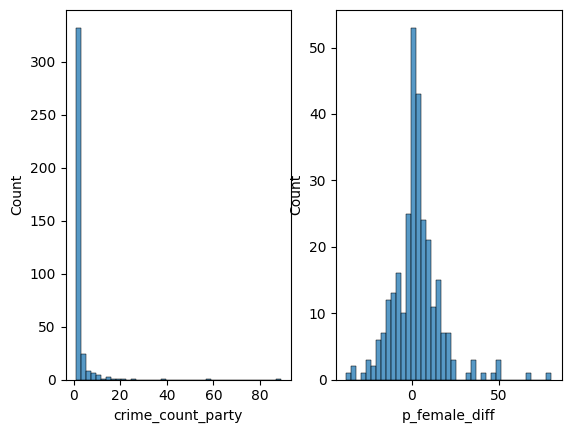

In [8]:
fig, axes = plt.subplots(1, 2)
sns.histplot(data = data_panel_diff[(data_panel_diff["crime_count_party"] >= 1)],
 x="crime_count_party", bins =41, ax = axes[0])
sns.histplot(data = data_panel_diff[(data_panel_diff["crime_count_party"] >= 1)],
 x="p_female_diff", bins =41, ax = axes[1])

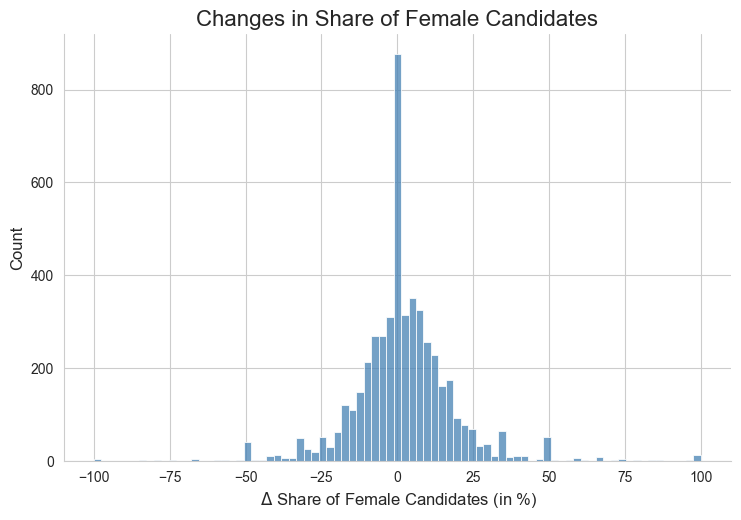

In [9]:
sns.set_style("whitegrid")
dist_sf = sns.displot(data=data_panel_diff, x="p_female_diff", kind='hist', bins =81, color="steelblue", aspect=1.5)
plt.xlabel(xlabel = " $\Delta$ Share of Female Candidates (in %)", size=12)
plt.ylabel(ylabel = "Count", size=12)
plt.title(label="Changes in Share of Female Candidates", size=16)
plt.savefig('dist_p_female.png')

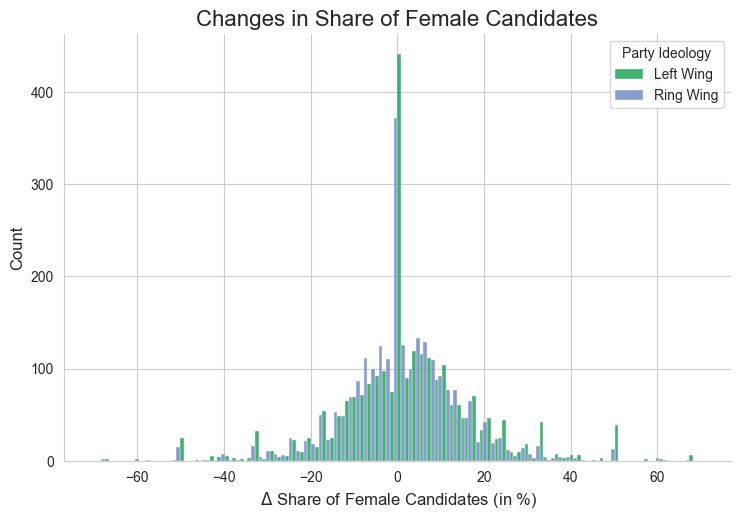

In [10]:
# Paper version
colors = ["#627BBF", "#009A44"]
sns.set_palette(sns.color_palette(colors))

dist_psf = sns.displot(data=data_panel_diff, x="p_female_diff", kind='hist', bins =81, aspect=1.5, hue="party_lr", multiple="dodge",
legend=False, binrange=(-70,70))
plt.xlabel(xlabel = " $\Delta$ Share of Female Candidates (in %)", size=12)
plt.ylabel(ylabel = "Count", size=12)
plt.title(label="Changes in Share of Female Candidates", size=16)
plt.legend(['Left Wing', 'Ring Wing'], title="Party Ideology")
plt.savefig('dist_p_female_lr.png')


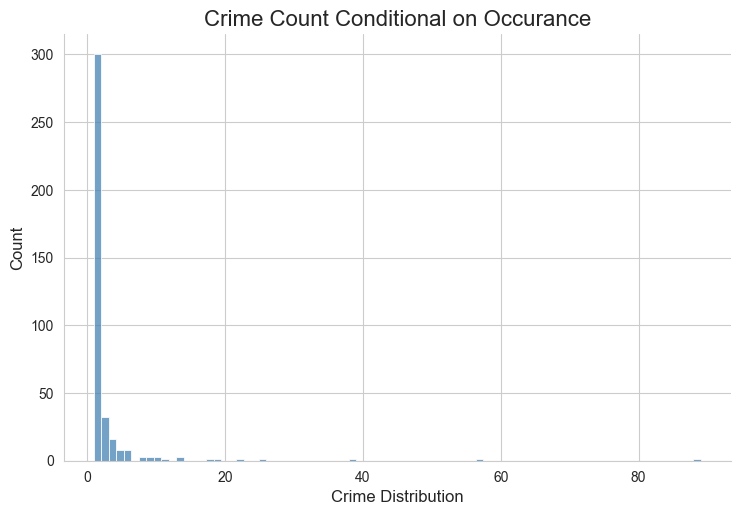

In [11]:
sns.displot(data = data_panel_diff[data_panel_diff["crime_count_party"] >=1], x="crime_count_party", color="steelblue", kind="hist", bins =81, aspect=1.5)
plt.xlabel(xlabel = "Crime Distribution", size=12)
plt.ylabel(ylabel = "Count", size=12)
plt.title(label="Crime Count Conditional on Occurance", size=16)
plt.savefig('dist_crime.png')


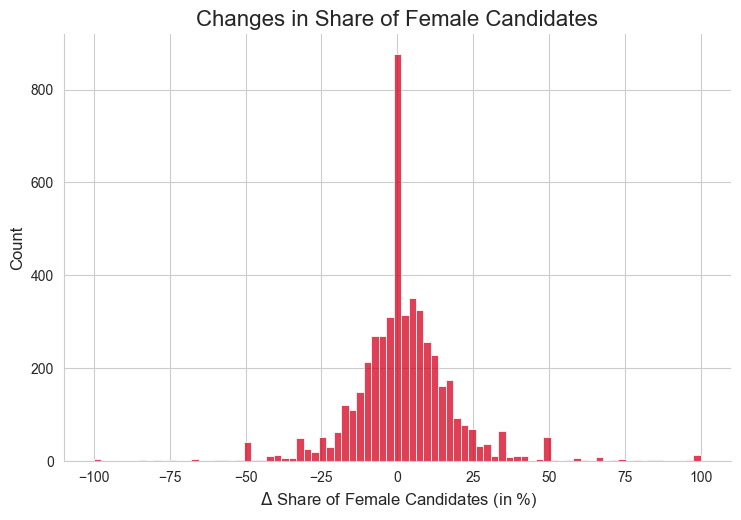

In [12]:
dist_sf = sns.displot(data=data_panel_diff, x="p_female_diff", kind='hist', bins =81, color="#D6001C", aspect=1.5)
plt.xlabel(xlabel = " $\Delta$ Share of Female Candidates (in %)", size=12)
plt.ylabel(ylabel = "Count", size=12)
plt.title(label="Changes in Share of Female Candidates", size=16)
plt.savefig('dist_p_female_christmas.png')


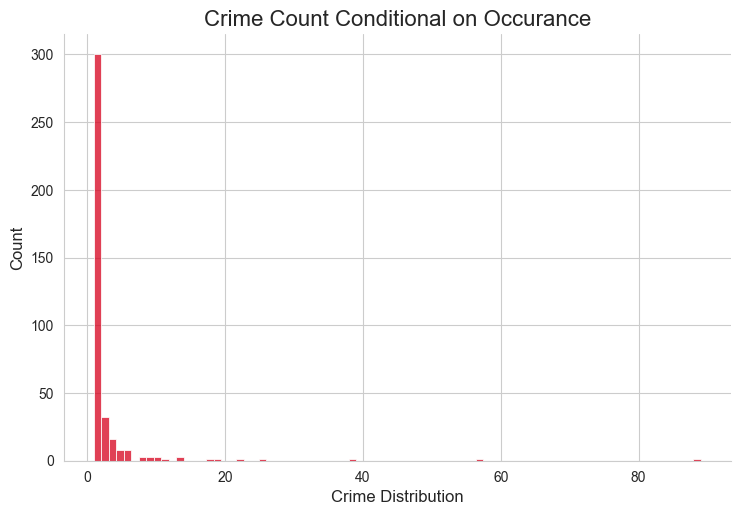

In [13]:
sns.displot(data = data_panel_diff[data_panel_diff["crime_count_party"] >=1], x="crime_count_party", color="#D6001C", kind="hist", bins =81, aspect=1.5)
plt.xlabel(xlabel = "Crime Distribution", size=12)
plt.ylabel(ylabel = "Count", size=12)
plt.title(label="Crime Count Conditional on Occurance", size=16)
plt.savefig('dist_crime_christmas.png')

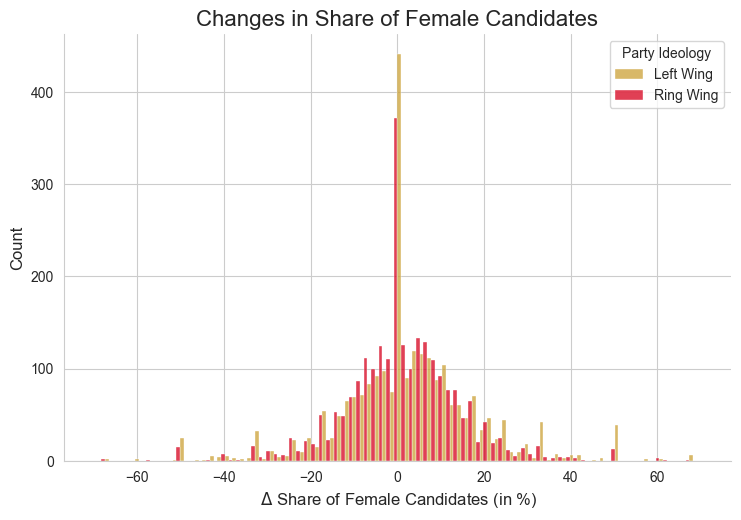

In [14]:
# Christmas version
colors = ["#D6001C", "#cba135"] # Christmas Red and Satin Sheet Gold
sns.set_palette(sns.color_palette(colors))

dist_psf_2 = sns.displot(data=data_panel_diff, x="p_female_diff", kind='hist', bins =81, aspect=1.5, hue="party_lr", multiple="dodge",
legend=False, binrange=(-70,70))
plt.xlabel(xlabel = " $\Delta$ Share of Female Candidates (in %)", size=12)
plt.ylabel(ylabel = "Count", size=12)
plt.title(label="Changes in Share of Female Candidates", size=16)
plt.legend(['Left Wing', 'Ring Wing'], title="Party Ideology")
plt.savefig('dist_p_female_lr_christmas.png')

In [15]:
plz_shape_df = gpd.read_file(r"C:\\Users\\Marius\\Downloads\\plz-5stellig.geojson")
#plz_shape_df = plz_shape_df[["plz", "geometry", "note", "qkm"]]
plz_shape_df["plz"] = plz_shape_df["plz"].astype(float)

In [46]:
# Make dataframe identification unique()
data_panel_diff[["plz","state","crime_count_party"]].groupby("plz").count().sort_values(by="state")

,state,crime_count_party
plz,,
6577.0,1,1
36088.0,1,1
99830.0,1,1
59969.0,1,1
15864.0,1,1
...,...,...
68723.0,18,18
88361.0,18,18
4509.0,19,19


In [57]:
# There is one plz that goes across states => drop or else plz is not unique for plotting
#data_panel_diff = data_panel_diff[data_panel_diff["pop"] != 459.0]
data_panel_diff = data_panel_diff[(data_panel_diff["plz"] != 69434)]

data_panel_diff_geo = data_panel_diff.groupby(["plz", "state"]).sum()
data_panel_diff_geo.reset_index(drop=False, inplace=True)
data_panel_diff_geo_2 = data_panel_diff.groupby(["plz", "state"]).mean()
data_panel_diff_geo_2.reset_index(drop=False, inplace=True)

C:\Users\Marius\AppData\Local\Temp\ipykernel_20000\4168248453.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_panel_diff_geo = data_panel_diff.groupby(["plz", "state"]).sum()
C:\Users\Marius\AppData\Local\Temp\ipykernel_20000\4168248453.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_panel_diff_geo_2 = data_panel_diff.groupby(["plz", "state"]).mean()


In [58]:
data_panel_diff_geo_2 = pd.merge(plz_shape_df, data_panel_diff_geo_2[["plz", "state", "p_female_diff"]], on="plz", how="left", validate="m:1")
data_panel_diff_geo = pd.merge(plz_shape_df, data_panel_diff_geo[["plz", "state", "crime_count_party"]], on="plz", how="left", validate="m:1")
data_panel_diff_geo.head()

,plz,note,einwohner,qkm,geometry,state,crime_count_party
0,81248.0,81248 München,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39484 48.14654...",NaN,NaN
1,60315.0,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67363 50.11152, ...",NaN,NaN
2,24988.0,24988 Oeversee,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36826 54.69609, ...",NaN,NaN
3,93185.0,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47701 49.13581...",NaN,NaN
4,93489.0,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54947 49.19254...",NaN,NaN


In [59]:
data_panel_diff_geo_2["city"] = data_panel_diff_geo_2["note"].str.split(r"[0-9][\s]", expand=True)[1]
data_panel_diff_geo["city"] = data_panel_diff_geo["note"].str.split(r"[0-9][\s]", expand=True)[1]

In [60]:
# For maps to fill all zip codes associated with one municipality
for city in data_panel_diff_geo_2["city"].unique():
    data_city = data_panel_diff_geo_2[data_panel_diff_geo_2["city"] == city]
    p_diff_now = data_city[~data_city["p_female_diff"].isna()]["p_female_diff"]
    state_now = data_city[~data_city["p_female_diff"].isna()]["state"]

    if p_diff_now.isna().all() == True:
        continue
    else:
        data_panel_diff_geo_2.loc[(data_panel_diff_geo_2["city"] == city), "state"] = state_now.values[0]
        data_panel_diff_geo_2.loc[(data_panel_diff_geo_2["city"] == city), "p_female_diff"] = p_diff_now.values[0]

In [62]:
# For crime dataframe
for city in data_panel_diff_geo["city"].unique():
    data_city = data_panel_diff_geo[data_panel_diff_geo["city"] == city]
    crime_now = data_city[~data_city["crime_count_party"].isna()]["crime_count_party"]
    state_now = data_city[~data_city["crime_count_party"].isna()]["state"]

    if crime_now.isna().all() == True:
        continue
    else:
        data_panel_diff_geo.loc[(data_panel_diff_geo["city"] == city), "state"] = state_now.values[0]
        data_panel_diff_geo.loc[(data_panel_diff_geo["city"] == city), "crime_count_party"] = crime_now.values[0]

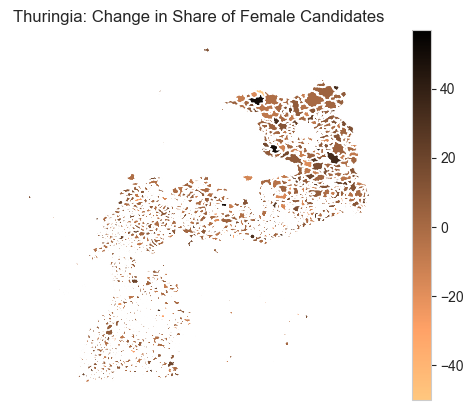

In [63]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
th_fem = data_panel_diff_geo_2.query('state == "TH"')
fig, ax = plt.subplots()

data_panel_diff_geo_2.plot(
    ax=ax, 
    column='p_female_diff', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Thuringia: Change in Share of Female Candidates', 
    aspect=1.3, 
    facecolor='lightblue'
)
plt.axis('off')
plt.savefig('th_sf.png')

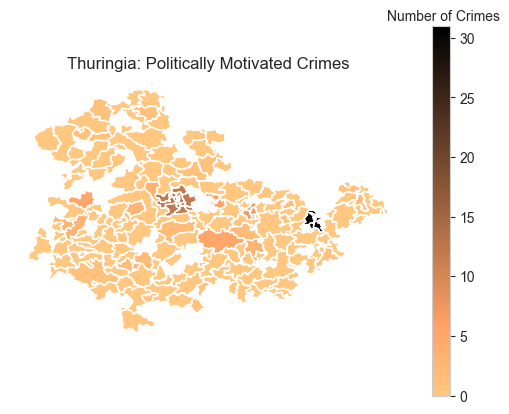

In [79]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
th_fem = data_panel_diff_geo.query('state == "TH"')
fig, ax = plt.subplots()

th_fem.plot(
    ax=ax, 
    column='crime_count_party', 
    categorical=False, 
    legend=True,
    cmap="copper_r",
)
    
ax.set(
    title='Thuringia: Politically Motivated Crimes', 
    aspect=1.3, 
    facecolor='lightblue'
)
ax.text(0.95, 1.25, "Number of Crimes", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))

plt.axis('off')
plt.savefig('th_cc.png')

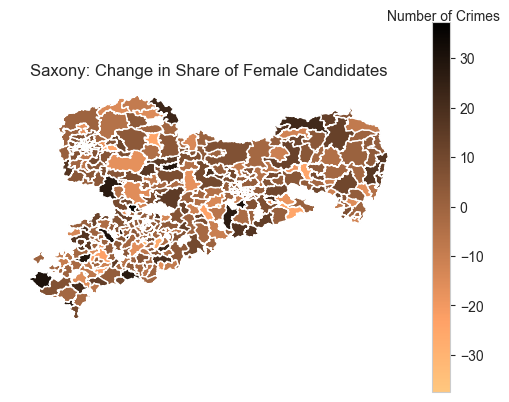

In [134]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
sn_crime = data_panel_diff_geo_2.query('state == "SN"')
sn_crime_2 = sn_crime[sn_crime["plz"] != 63936]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 21258]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 71737]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 94259]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 84434]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 94530]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 92449]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 29468]

fig, ax = plt.subplots()

sn_crime_2.plot(
    ax=ax, 
    column='p_female_diff', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Saxony: Change in Share of Female Candidates', 
    aspect=1.3, 
    facecolor='lightblue'
)

ax.text(0.95, 1.3, "Number of Crimes", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))
plt.axis('off')

plt.savefig('sn_sf.png')

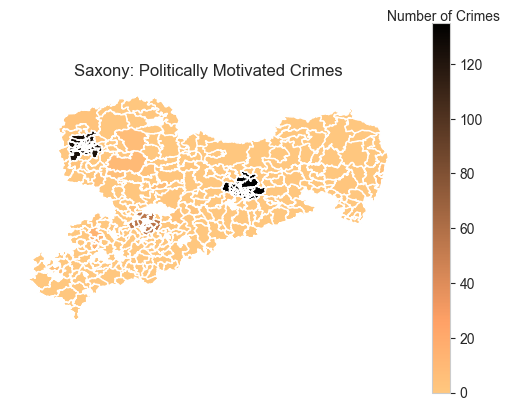

In [137]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
sn_crime = data_panel_diff_geo.query('state == "SN"')
sn_crime_2 = sn_crime[sn_crime["plz"] != 63936]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 21258]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 71737]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 94259]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 84434]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 94530]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 92449]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 29468]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 83346]
sn_crime_2 = sn_crime_2[sn_crime_2["plz"] != 55608]

fig, ax = plt.subplots()

sn_crime_2.plot(
    ax=ax, 
    column='crime_count_party', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Saxony: Politically Motivated Crimes', 
    aspect=1.3, 
    facecolor='lightblue'
)
ax.text(0.95, 1.3, "Number of Crimes", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))

plt.axis('off')
plt.savefig('sn_cc.png')

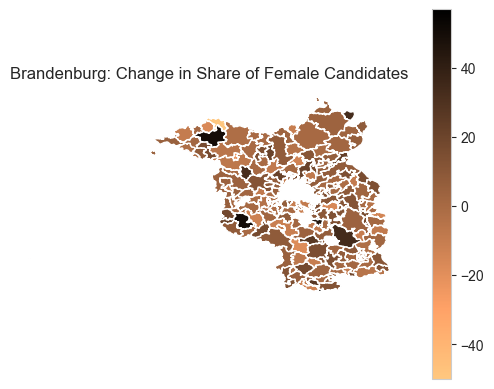

In [97]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
th_fem = data_panel_diff_geo_2.query('state == "BB"')
fig, ax = plt.subplots()

th_fem.plot(
    ax=ax, 
    column='p_female_diff', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Brandenburg: Change in Share of Female Candidates', 
    aspect=1.3, 
    facecolor='lightblue'
)
plt.axis('off')
plt.savefig('bb_sf.png')

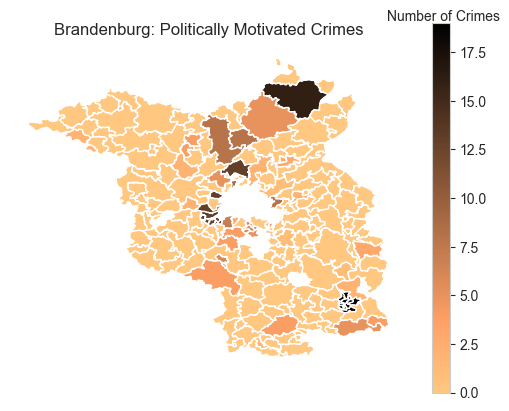

In [140]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
bb_crime = data_panel_diff_geo.query('state == "BB"')
bb_crime = bb_crime[bb_crime["plz"] != 29497]
bb_crime = bb_crime[bb_crime["plz"] != 37699]
fig, ax = plt.subplots()

bb_crime.plot(
    ax=ax, 
    column='crime_count_party', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Brandenburg: Politically Motivated Crimes', 
    aspect=1.3, 
    facecolor='lightblue'
)
ax.text(0.95, 1.1, "Number of Crimes", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))

plt.axis('off')
plt.savefig('bb_cc.png')

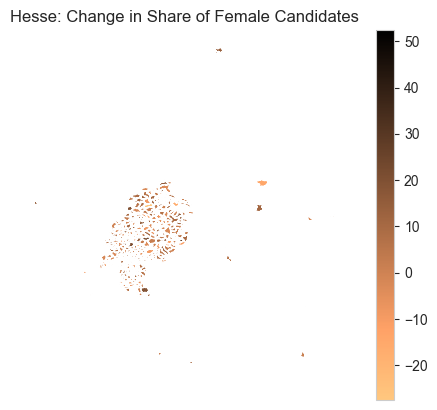

In [99]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
th_fem = data_panel_diff_geo_2.query('state == "HE"')
fig, ax = plt.subplots()

th_fem.plot(
    ax=ax, 
    column='p_female_diff', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Hesse: Change in Share of Female Candidates', 
    aspect=1.3, 
    facecolor='lightblue'
)
plt.axis('off')
plt.savefig('he_sf.png')

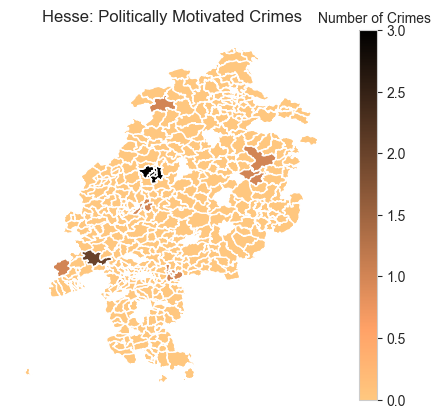

In [179]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
hessen_crime = data_panel_diff_geo.query('state == "HE"')
hessen_crime = hessen_crime[hessen_crime["plz"] != 23730]
hessen_crime = hessen_crime[hessen_crime["plz"] != 85456]
hessen_crime = hessen_crime[hessen_crime["plz"] != 72531]
hessen_crime = hessen_crime[hessen_crime["plz"] != 41366]
hessen_crime = hessen_crime[hessen_crime["plz"] != 87727]
hessen_crime = hessen_crime[hessen_crime["plz"] != 6193]
hessen_crime = hessen_crime[hessen_crime["plz"] != 90765]
hessen_crime = hessen_crime[hessen_crime["plz"] != 1734]
hessen_crime = hessen_crime[hessen_crime["plz"] != 9669]
hessen_crime = hessen_crime[hessen_crime["plz"] != 55490]
hessen_crime = hessen_crime[hessen_crime["plz"] != 97490]
hessen_crime = hessen_crime[hessen_crime["plz"] != 90763]
hessen_crime = hessen_crime[hessen_crime["plz"] != 90762]
hessen_crime = hessen_crime[hessen_crime["plz"] != 90766]
hessen_crime = hessen_crime[hessen_crime["plz"] != 90768]
hessen_crime = hessen_crime[hessen_crime["plz"] != 93485]
hessen_crime = hessen_crime[hessen_crime["plz"] != 84367]
hessen_crime = hessen_crime[hessen_crime["plz"] != 95496]
hessen_crime = hessen_crime[hessen_crime["plz"] != 96215]
hessen_crime = hessen_crime[hessen_crime["plz"] != 95496]
hessen_crime = hessen_crime[hessen_crime["plz"] != 96486]
hessen_crime = hessen_crime[hessen_crime["plz"] != 89281]
hessen_crime = hessen_crime[hessen_crime["plz"] != 86972]
hessen_crime = hessen_crime[hessen_crime["plz"] != 6618]

fig, ax = plt.subplots()


hessen_crime.plot(
    ax=ax, 
    column='crime_count_party', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Hesse: Politically Motivated Crimes', 
    aspect=1.3, 
    facecolor='lightblue'
)
ax.text(0.95, 1.05, "Number of Crimes", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))

plt.axis('off')
plt.savefig('he_cc.png')

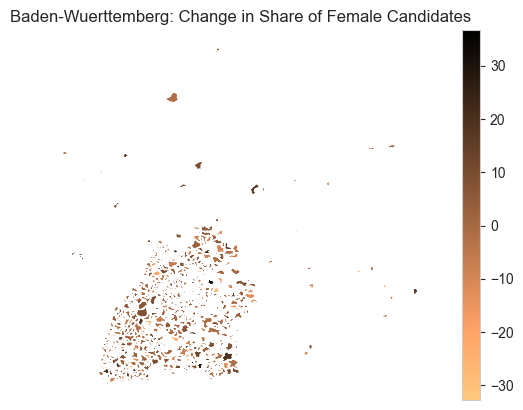

In [251]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
th_fem = data_panel_diff_geo_2.query('state == "BW"')
fig, ax = plt.subplots()

th_fem.plot(
    ax=ax, 
    column='p_female_diff', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Baden-Wuerttemberg: Change in Share of Female Candidates', 
    aspect=1.3, 
    facecolor='lightblue'
)
plt.axis('off')
plt.savefig('bw_sf.png')

In [182]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
bw_crime = data_panel_diff_geo.query('state == "BW"')
fig, ax = plt.subplots()

th_fem.plot(
    ax=ax, 
    column='crime_count_party', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='Baden-Wuerttemberg: Politically Motivated Crimes', 
    aspect=1.3, 
    facecolor='lightblue'
)
plt.axis('off')
plt.savefig('bw_cc.png')

,plz,note,einwohner,qkm,geometry,state,crime_count_party,city
0,81248.0,81248 München,121,1.984763,"POLYGON ((11.39468 48.14729, 11.39484 48.14654...",NaN,NaN,München
1,60315.0,60315 Frankfurt am Main (FOUR),0,0.017481,"POLYGON ((8.67254 50.11264, 8.67363 50.11152, ...",NaN,NaN,Frankfurt am Main (FOUR)
2,24988.0,24988 Oeversee,3350,36.491463,"POLYGON ((9.36585 54.69994, 9.36826 54.69609, ...",NaN,NaN,Oeversee
3,93185.0,93185 Michelsneukirchen,1786,32.873844,"POLYGON ((12.47666 49.13598, 12.47701 49.13581...",NaN,NaN,Michelsneukirchen
4,93489.0,93489 Schorndorf,2622,38.597260,"POLYGON ((12.54904 49.19318, 12.54947 49.19254...",BW,2.0,Schorndorf
...,...,...,...,...,...,...,...,...
8165,63874.0,63874 Dammbach,1819,32.868150,"POLYGON ((9.28704 49.86601, 9.28717 49.86584, ...",NaN,NaN,Dammbach
8166,63856.0,63856 Bessenbach,5844,29.859154,"POLYGON ((9.21845 49.96548, 9.21852 49.96548, ...",NaN,NaN,Bessenbach
8167,63869.0,63869 Heigenbrücken,2208,8.415089,"POLYGON ((9.30293 50.04595, 9.30347 50.04562, ...",NaN,NaN,Heigenbrücken
8168,75339.0,75339 Höfen an der Enz,1619,9.081771,"POLYGON ((8.55002 48.79175, 8.55222 48.79120, ...",BW,0.0,Höfen an der Enz


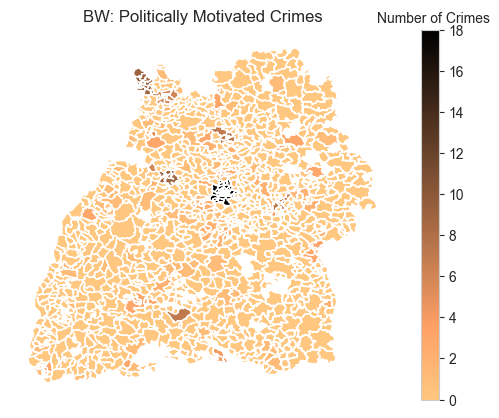

In [263]:
#geodata = pd.merge(data_panel_diff_geo_3, plz_shape_df, on="plz", how="left", validate="1:m")
sns.set_palette(sns.color_palette(colors))

# Make plots
    
bw_crime = data_panel_diff_geo.query('state == "BW"')
bw_crime = bw_crime[bw_crime["plz"] != 8107]
bw_crime = bw_crime[bw_crime["plz"] != 8396]
bw_crime = bw_crime[bw_crime["plz"] != 9244]
bw_crime = bw_crime[bw_crime["plz"] != 9350]
bw_crime = bw_crime[bw_crime["plz"] != 21224]
bw_crime = bw_crime[bw_crime["plz"] != 30966]
bw_crime = bw_crime[bw_crime["plz"] != 33165]
bw_crime = bw_crime[bw_crime["plz"] != 36341]
bw_crime = bw_crime[bw_crime["plz"] != 50321]
bw_crime = bw_crime[bw_crime["plz"] != 56317]
bw_crime = bw_crime[bw_crime["plz"] != 56653]
bw_crime = bw_crime[bw_crime["plz"] != 57290]
bw_crime = bw_crime[bw_crime["plz"] != 63683]
bw_crime = bw_crime[bw_crime["plz"] != 63925]
bw_crime = bw_crime[bw_crime["plz"] != 63930]
bw_crime = bw_crime[bw_crime["plz"] != 64711]
bw_crime = bw_crime[bw_crime["plz"] != 65391]
bw_crime = bw_crime[bw_crime["plz"] != 66538]
bw_crime = bw_crime[bw_crime["plz"] != 66539]
bw_crime = bw_crime[bw_crime["plz"] != 66540]
bw_crime = bw_crime[bw_crime["plz"] != 66557]
bw_crime = bw_crime[bw_crime["plz"] != 91097]
bw_crime = bw_crime[bw_crime["plz"] != 91301]
bw_crime = bw_crime[bw_crime["plz"] != 91359]
bw_crime = bw_crime[bw_crime["plz"] != 91489]
bw_crime = bw_crime[bw_crime["plz"] != 91586]
bw_crime = bw_crime[bw_crime["plz"] != 91626]
bw_crime = bw_crime[bw_crime["plz"] != 92360]
bw_crime = bw_crime[bw_crime["plz"] != 92366]
bw_crime = bw_crime[bw_crime["plz"] != 92702]
bw_crime = bw_crime[bw_crime["plz"] != 93192]
bw_crime = bw_crime[bw_crime["plz"] != 93489]
bw_crime = bw_crime[bw_crime["plz"] != 94259]
bw_crime = bw_crime[bw_crime["plz"] != 94374]
bw_crime = bw_crime[bw_crime["plz"] != 94377]
bw_crime = bw_crime[bw_crime["plz"] != 94481]
bw_crime = bw_crime[bw_crime["plz"] != 94554]
bw_crime = bw_crime[bw_crime["plz"] != 95180]
bw_crime = bw_crime[bw_crime["plz"] != 96163]
bw_crime = bw_crime[bw_crime["plz"] != 96172]
bw_crime = bw_crime[bw_crime["plz"] != 96523]
bw_crime = bw_crime[bw_crime["plz"] != 97249]
bw_crime = bw_crime[bw_crime["plz"] != 97252]
bw_crime = bw_crime[bw_crime["plz"] != 97633]
bw_crime = bw_crime[bw_crime["plz"] != 97834]
bw_crime = bw_crime[bw_crime["plz"] != 97877]
bw_crime = bw_crime[bw_crime["plz"] != 97896]
bw_crime = bw_crime[bw_crime["plz"] != 82061]
bw_crime = bw_crime[bw_crime["plz"] != 82285]
bw_crime = bw_crime[bw_crime["plz"] != 82335]
bw_crime = bw_crime[bw_crime["plz"] != 83368]
bw_crime = bw_crime[bw_crime["plz"] != 84337]
bw_crime = bw_crime[bw_crime["plz"] != 84434]
bw_crime = bw_crime[bw_crime["plz"] != 85095]
bw_crime = bw_crime[bw_crime["plz"] != 86519]
bw_crime = bw_crime[bw_crime["plz"] != 86871]
bw_crime = bw_crime[bw_crime["plz"] != 87778]
bw_crime = bw_crime[bw_crime["plz"] != 87784]
bw_crime = bw_crime[bw_crime["plz"] != 89269]
bw_crime = bw_crime[bw_crime["plz"] != 89367]
bw_crime = bw_crime[bw_crime["plz"] != 89368]
bw_crime = bw_crime[bw_crime["plz"] != 99846]


fig, ax = plt.subplots()

bw_crime.plot(
    ax=ax, 
    column='crime_count_party', 
    categorical=False, 
    legend=True, 
    cmap='copper_r',
)
    
ax.set(
    title='BW: Politically Motivated Crimes', 
    aspect=1.3, 
    facecolor='lightblue'
)
ax.text(0.95, 1.05, "Number of Crimes", transform=ax.transAxes, fontsize=10,
        verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0))


plt.axis('off')
plt.savefig('bw_cc.png')

In [226]:
max_list = data_panel_diff[["crime_count_party", "city"]].sort_values(by="crime_count_party")
max_list.groupby("city").sum().sort_values(by="crime_count_party")[-20:]

,crime_count_party
city,
Zehdenick,8.0
Hoppegarten,8.0
Hohen Neuendorf,9.0
Wertheim,9.0
Grimma,9.0
Pforzheim,9.0
Mannheim,9.0
Erfurt,12.0
Falkensee,13.0


In [7]:
print("Conditional means based on party (no restriction to wether a crime has happened or whether the party stood twice)")
data_panel_diff.groupby(['party'], as_index=False).mean()[['party', 'crime_count_party', 'p_female_diff']], len(data_panel_diff[~data_panel_diff['p_female_diff'].isna()])

Conditional means based on party (no restriction to wether a crime has happened or whether the party stood twice)


C:\Users\Marius\AppData\Local\Temp\ipykernel_80680\4271981791.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_panel_diff.groupby(['party'], as_index=False).mean()[['party', 'crime_count_party', 'p_female_diff']], len(data_panel_diff[~data_panel_diff['p_female_diff'].isna()])


(       party  crime_count_party  p_female_diff
 0        AfD           0.346995       4.722508
 1        CDU           0.087256       1.522936
 2  DIE LINKE           0.081562       2.868497
 3        FDP           0.030656       1.616425
 4      GRÜNE           0.064694       3.132141
 5        SPD           0.070866       1.831817,
 4948)

In [8]:
# Drop missing values
data_panel_diff.dropna(subset=['p_female_diff', 'crime_count_party'], inplace=True)
print("Conditional means based on party when they stood for office twice")
data_panel_diff.groupby(['party'], as_index=False).mean()[['party', 'crime_count_party', 'p_female_diff']], len(data_panel_diff[~data_panel_diff['p_female_diff'].isna()])

Conditional means based on party when they stood for office twice


C:\Users\Marius\AppData\Local\Temp\ipykernel_80680\2491307197.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_panel_diff.groupby(['party'], as_index=False).mean()[['party', 'crime_count_party', 'p_female_diff']], len(data_panel_diff[~data_panel_diff['p_female_diff'].isna()])


(       party  crime_count_party  p_female_diff
 0        AfD           4.779661       4.722508
 1        CDU           0.107952       1.522936
 2  DIE LINKE           0.232358       2.868497
 3        FDP           0.079523       1.616425
 4      GRÜNE           0.150000       3.132141
 5        SPD           0.104685       1.831817,
 4948)

In [417]:
data_panel_diff_law = data_panel_diff.copy()
data_panel_diff_law["law"] = data_panel_diff_law["law"].str.replace("STGB", "").str.replace("StGB", "").str.replace("-", "").str.replace(" ", "").str.replace("86A", "86a")
data_panel_diff_law["crime"] = data_panel_diff_law["crime"].str.replace(r"ddes", r"des")
data_panel_diff_law["crime"] = data_panel_diff_law["crime"].str.replace(r"Sachbeschadigung Sachbeschadigung Sachbeschadigung", r"Sachbeschadigung Sachbeschadigung")

data_panel_diff_law.groupby(["crime", "law"]).sum()["crime_count_party"]

C:\Users\Marius\AppData\Local\Temp\ipykernel_80680\994091174.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data_panel_diff_law.groupby(["crime", "law"]).sum()["crime_count_party"]


crime                                                                                    law 
Ausspahen von Daten                                                                      202A     19.0
Bedrohung                                                                                241      12.0
Beleidigung                                                                              185      36.0
Beleidigung, Beschimpfung von Bekentnisse, Religionsgemeinschaften und Weltanschauungen  166       3.0
Besonders schwerer Fall des Diebstahls                                                   243       6.0
Diebstahl                                                                                242      90.0
Diebstahl mit Waffen;                                                                    244       1.0
Gefahrliche Korperverletzung Korperverletzung                                            224       3.0
Gefahrliche Korperverletzung Korperverletzung den StraÃenverkehr                 